<a href="https://colab.research.google.com/github/charann90/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

# Data uploading

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#understanding the statistical information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data cleaning

In [ ]:
#checking null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values present

In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


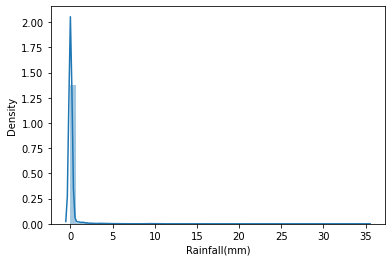

In [ ]:
sns.distplot(df['Rainfall(mm)'])

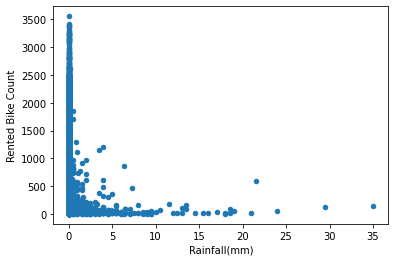

In [ ]:
df.plot.scatter(x='Rainfall(mm)',y='Rented Bike Count')

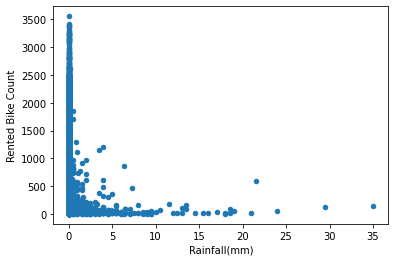

In [ ]:
df.plot.scatter(x='Rainfall(mm)',y='Rented Bike Count')

In [ ]:
#creating seperating columns for yaer and month
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

In [ ]:
#dropping date column
df.drop('Date',axis=1,inplace=True)

In [ ]:
#listing all the categorical columns
categorical_col=['Seasons','Holiday','Functioning Day']

In [ ]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#creatinhg a function to plot the frequency distributions of categorical columns
def category(col):
  for i in categorical_col:
    plt.figure(figsize=(10,5))
    df[i].value_counts().head(10).plot(kind='bar')  
    plt.title(f'{i}') 
    plt.show()

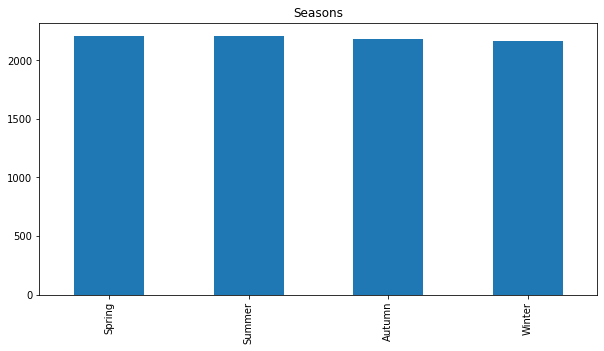

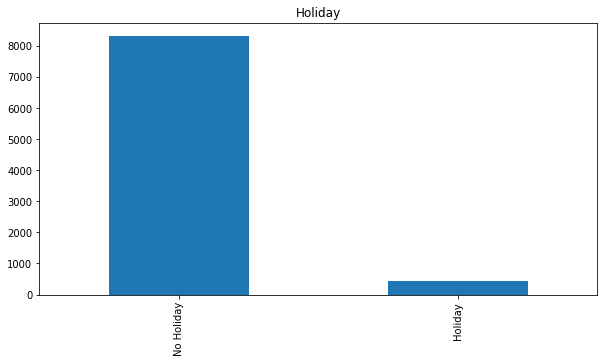

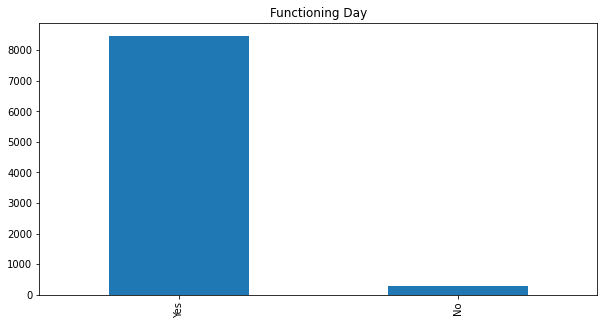

In [ ]:
category(categorical_col)

In [ ]:
#sales per year
year_sales=df.groupby(['year'])['Rented Bike Count'].sum()
year_sales

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'sales')

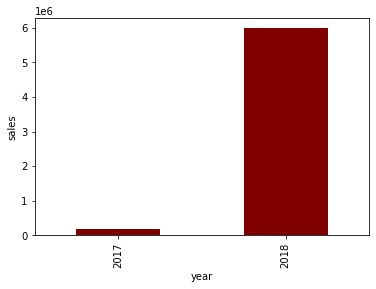

In [ ]:
#plotting year sales
year_sales.plot.bar(color='maroon')
plt.ylabel('sales')

In [ ]:
#listing all the numerical columns
num_col=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

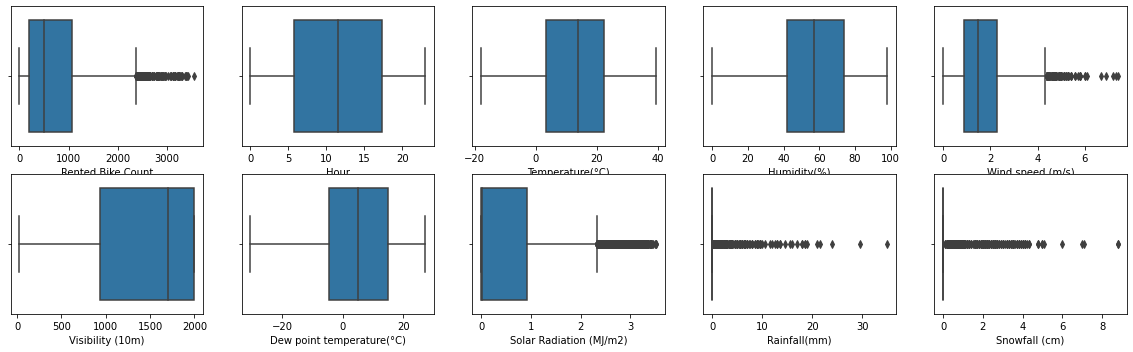

In [ ]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(num_col):
  plt.subplot(6,5,index+1)
  sns.boxplot(data=df,x=i)

*We see outliers in five features so dealing with the outliers is necessary to get the most accurate prediction.

*Deleteting the features rainfall and snowfall which has maximum outliers to preventing affecting the functionality of the prediction.
*Replacing the outlier values by nearest quantile values to reduce outliers

In [ ]:
max_val = df['Wind speed (m/s)'].quantile(0.95)
df['Wind speed (m/s)'] = np.where(df['Wind speed (m/s)']>max_val,max_val,df['Wind speed (m/s)'])

max_val = df['Solar Radiation (MJ/m2)'].quantile(0.95)
df['Solar Radiation (MJ/m2)'] = np.where(df['Solar Radiation (MJ/m2)']>max_val,max_val,df['Solar Radiation (MJ/m2)'])

max_val = df['Rented Bike Count'].quantile(0.95)
df['Rented Bike Count'] = np.where(df['Rented Bike Count']>max_val,max_val,df['Rented Bike Count'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


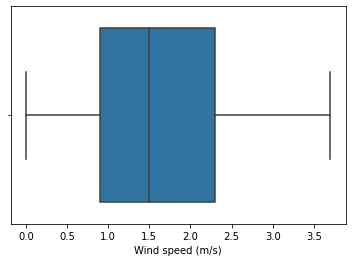

In [ ]:
sns.boxplot(df['Wind speed (m/s)'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


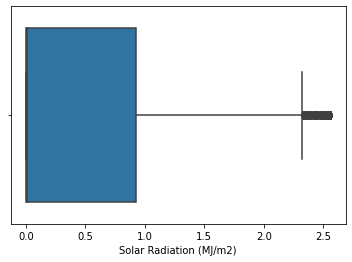

In [ ]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

In [ ]:
'''outliers=np.where(df['Wind speed (m/s)']>=4)
df.drop(outliers[0].index,inplace=True)'''

"outliers=np.where(df['Wind speed (m/s)']>=4)\ndf.drop(outliers[0].index,inplace=True)"

In [ ]:
'''outliers=np.where(df['Solar Radiation (MJ/m2)']>=2)
df.drop(outliers[0],inplace=True)'''

"outliers=np.where(df['Solar Radiation (MJ/m2)']>=2)\ndf.drop(outliers[0],inplace=True)"

In [ ]:
'''def remove_outliers(columns):
    for col in df[columns]:
        
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean*sd)]
        
    return df'''

'def remove_outliers(columns):\n    for col in df[columns]:\n        \n        \n        mean = df[col].mean()\n        sd = df[col].std()\n        \n        df = df[(df[col] <= mean*sd)]\n        \n    return df'

In [ ]:
#dropping columns rainfall and snowfall as it has maximum outliers
df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

In [ ]:
#sales for different months
month_sales=pd.DataFrame(df.groupby(['month','year'])['Rented Bike Count'].sum().sort_values(ascending=False)).reset_index()
month_sales

,month,year,Rented Bike Count
0,7,2018,667513.0
1,6,2018,662270.0
2,5,2018,632448.0
3,10,2018,613279.0
4,8,2018,593233.0
5,4,2018,534733.0
6,11,2018,482714.0
7,9,2018,480361.0
8,3,2018,443068.0
9,1,2018,274668.0


In [ ]:
year1= pd.DataFrame(month_sales[month_sales['year']==2017])
year2= pd.DataFrame(month_sales[month_sales['year']==2018])

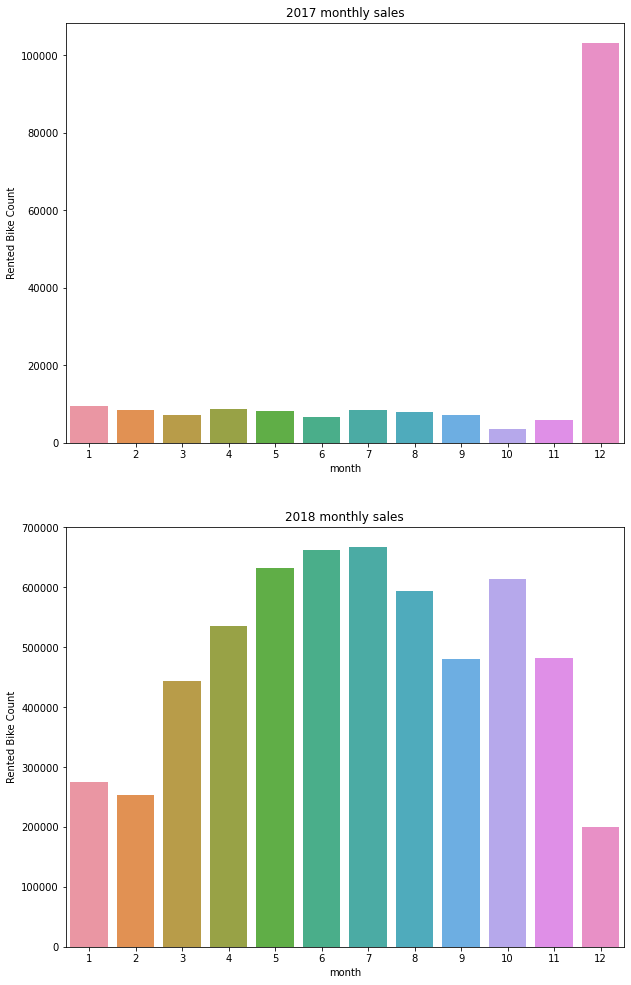

In [ ]:
fig= plt.figure(figsize=(10,17))
axs=fig.add_subplot(2,1,1)
sns.barplot(data=year1,x='month',y='Rented Bike Count',ax=axs)
plt.title('2017 monthly sales')

axs=fig.add_subplot(2,1,2)
sns.barplot(data=year2,x='month',y='Rented Bike Count',ax=axs)
plt.title('2018 monthly sales')

plt.show()

In [ ]:
#sales in different hours
hour_sales=pd.DataFrame(df.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False))
hour_sales

,Rented Bike Count
Hour,
18,469657.0
19,409616.0
17,406563.0
20,377414.0
21,369604.0
8,361864.0
16,336397.0
22,335792.0
15,301180.0


In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

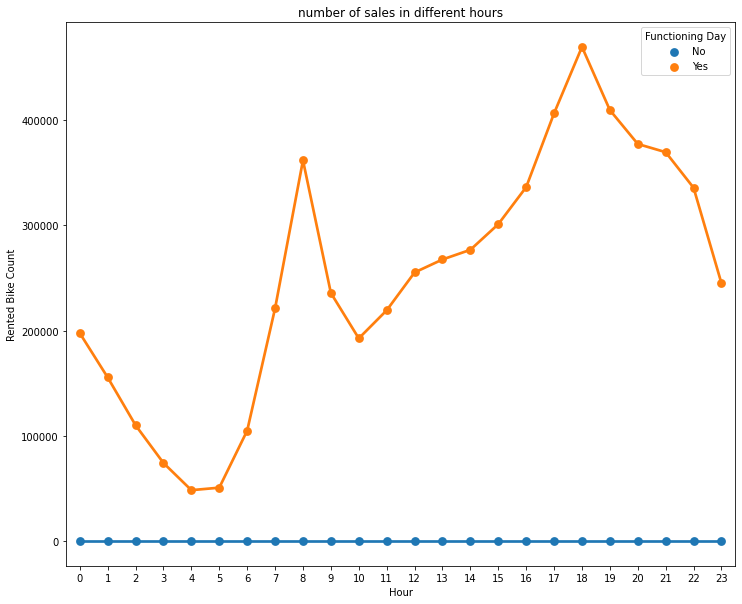

In [ ]:
#plotting sales in diffrent hours for functioning day
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Functioning Day', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Functioning Day')
plt.title('number of sales in different hours')
plt.show()

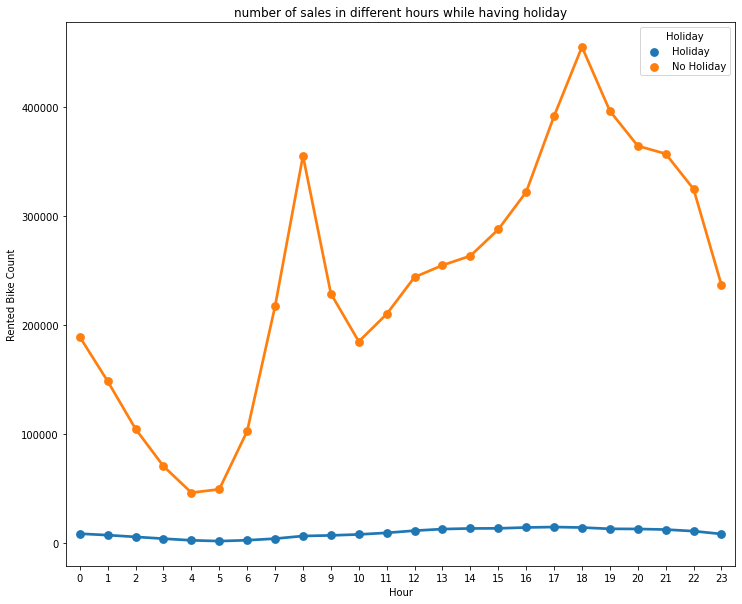

In [ ]:
#plotting sales in diffrent hours in holidays 
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('number of sales in different hours while having holiday')
plt.show()

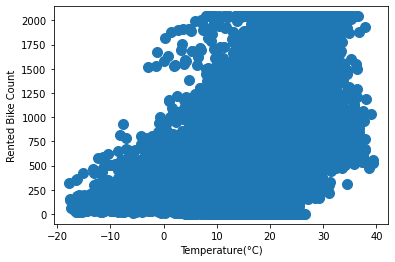

In [ ]:
df.plot.scatter(x='Temperature(°C)',y='Rented Bike Count',s=100)

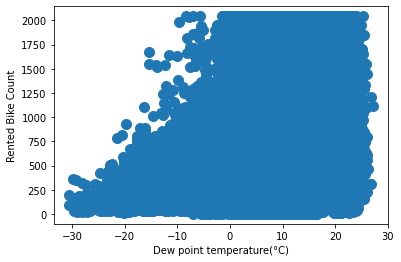

In [ ]:
df.plot.scatter(x='Dew point temperature(°C)',y='Rented Bike Count',s=100)


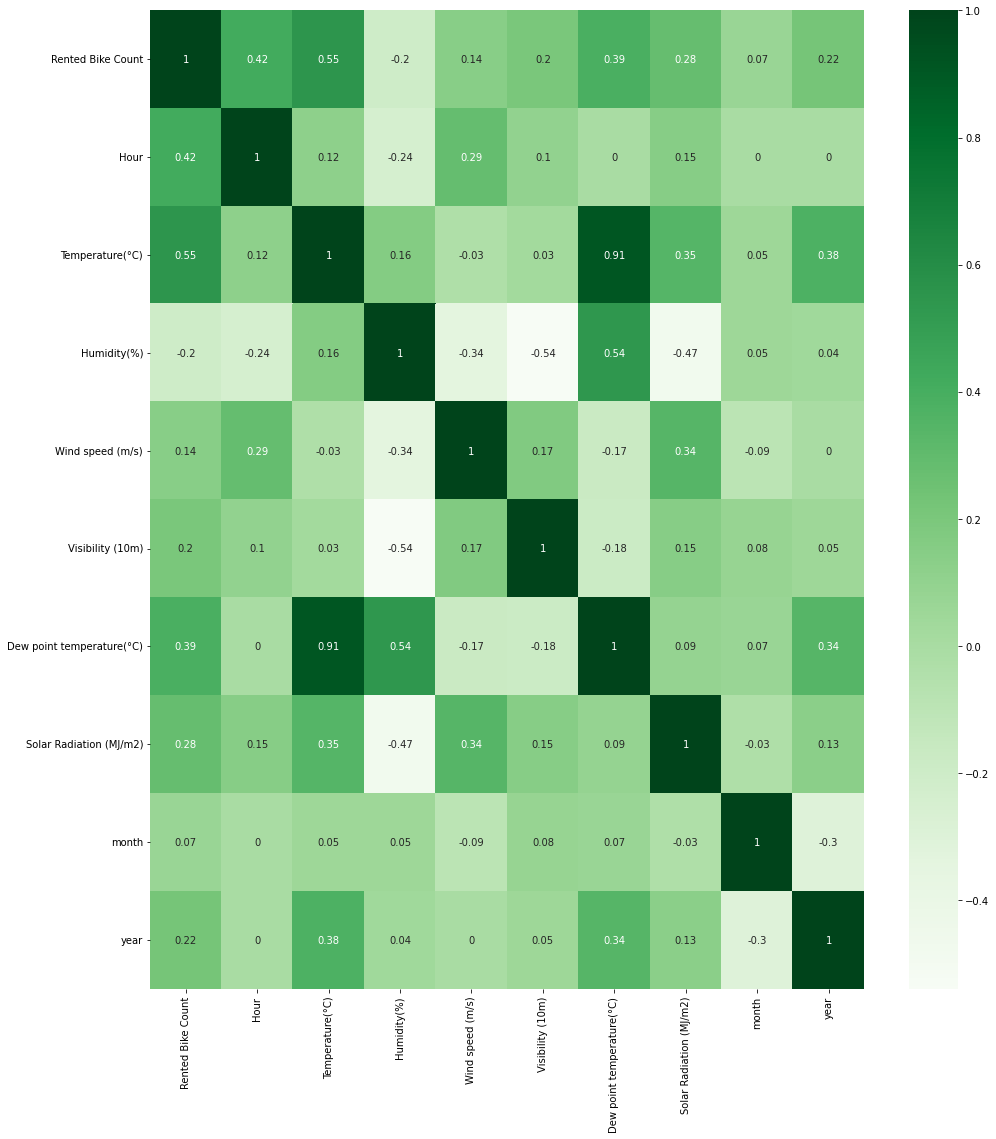

In [ ]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(16,18))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
categorical_col=['Seasons','Holiday','Functioning Day']

In [ ]:
df = pd.get_dummies(df, columns = categorical_col)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,1,2017,0,0,0,1,0,1,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,1,2017,0,0,0,1,0,1,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,1,2017,0,0,0,1,0,1,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,1,2017,0,0,0,1,0,1,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,1,2017,0,0,0,1,0,1,0,1


In [ ]:
numeric_features=df.drop(['Rented Bike Count'],axis=1).columns.tolist()

In [ ]:
numeric_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'month',
 'year',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_Holiday',
 'Holiday_No Holiday',
 'Functioning Day_No',
 'Functioning Day_Yes']

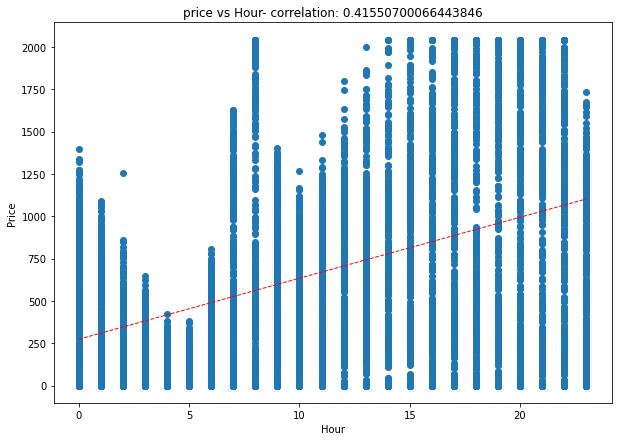

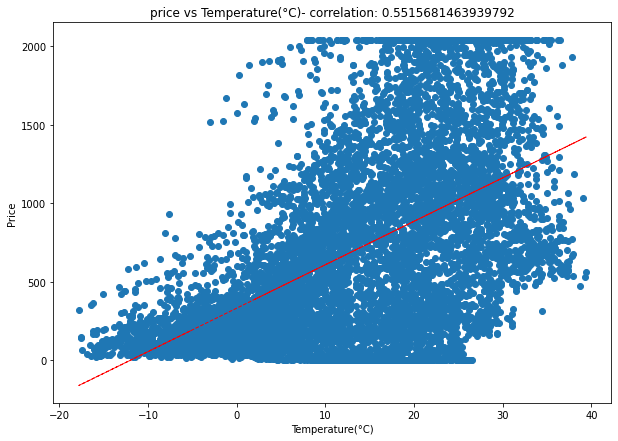

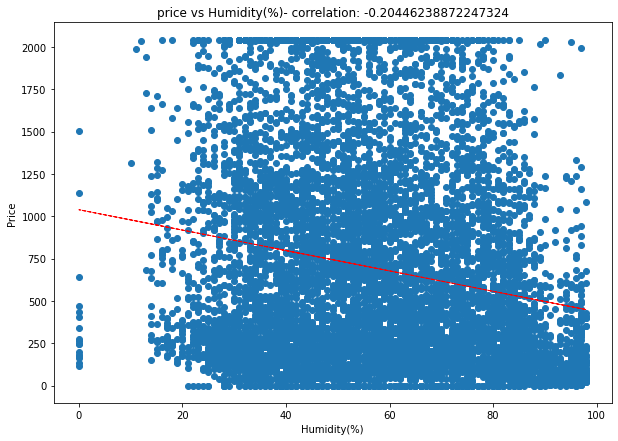

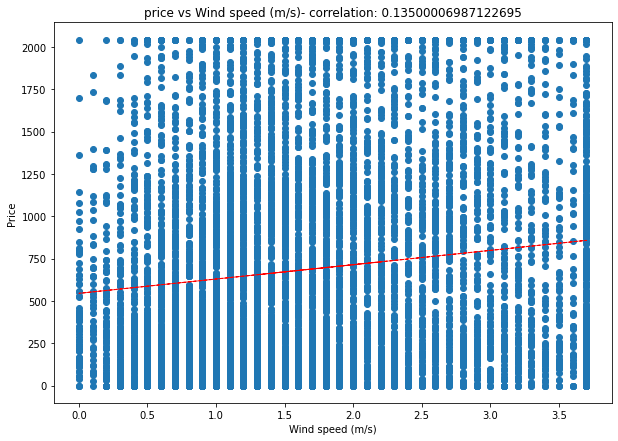

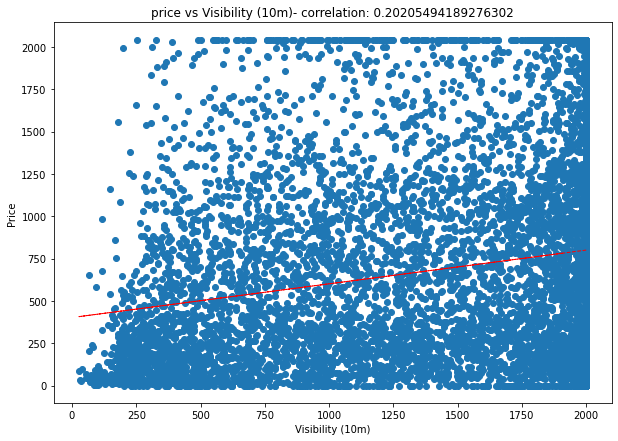

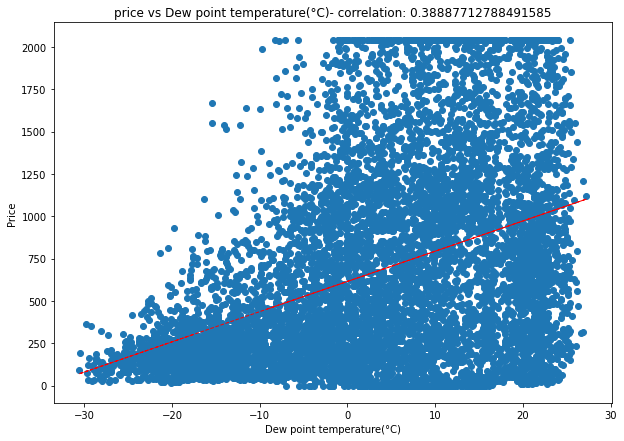

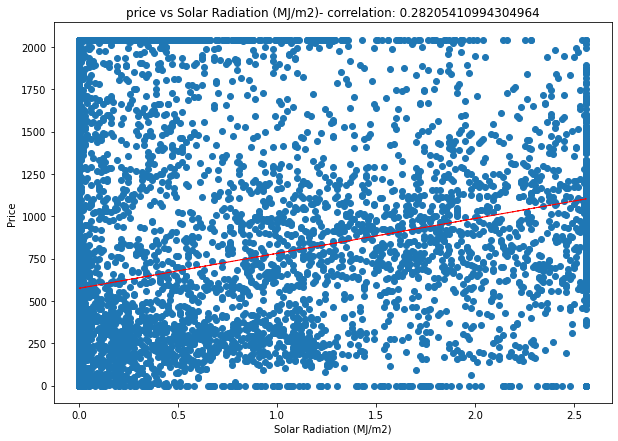

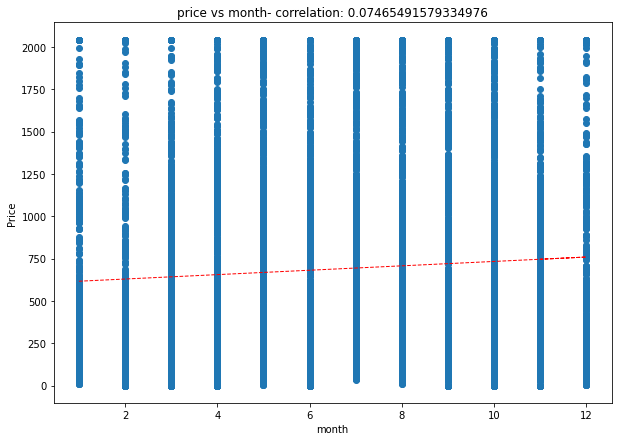

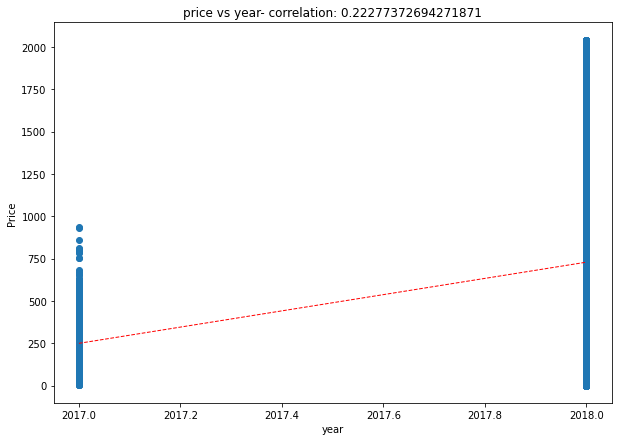

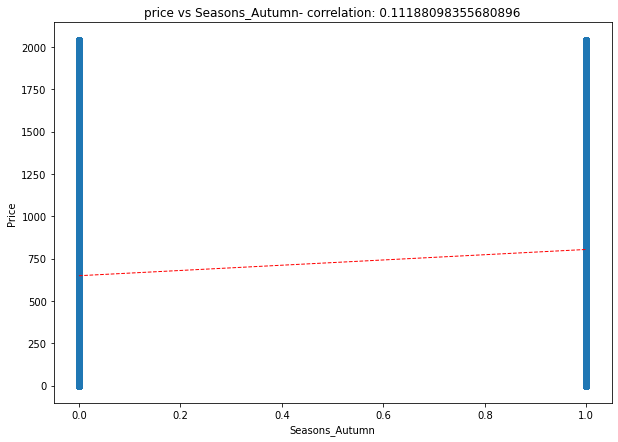

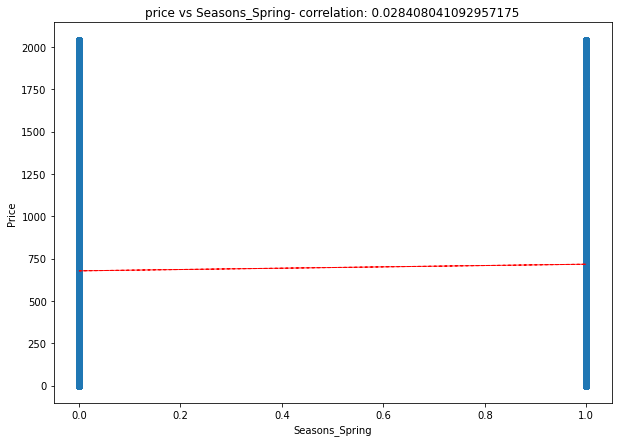

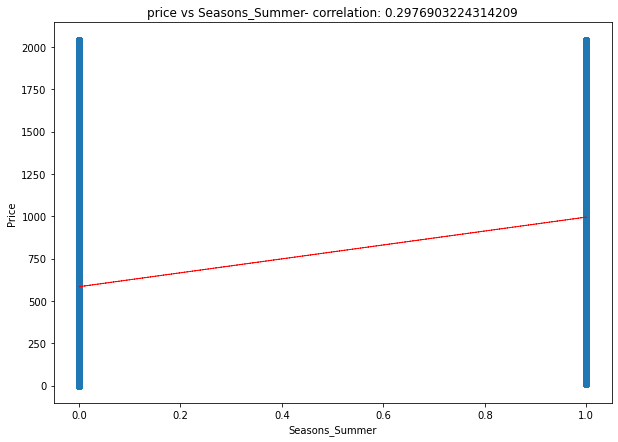

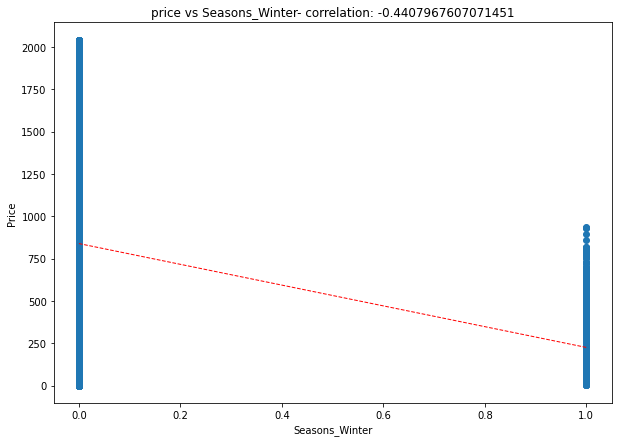

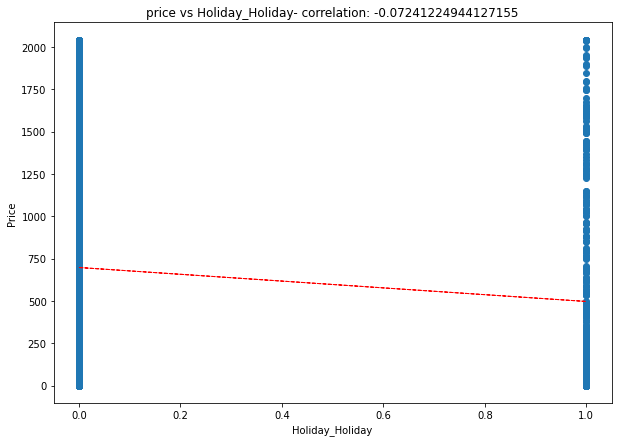

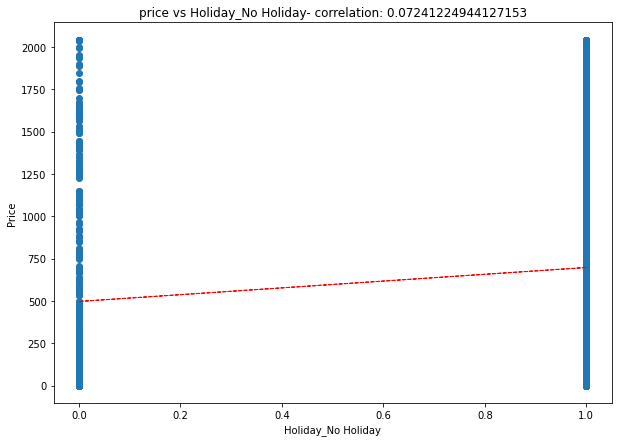

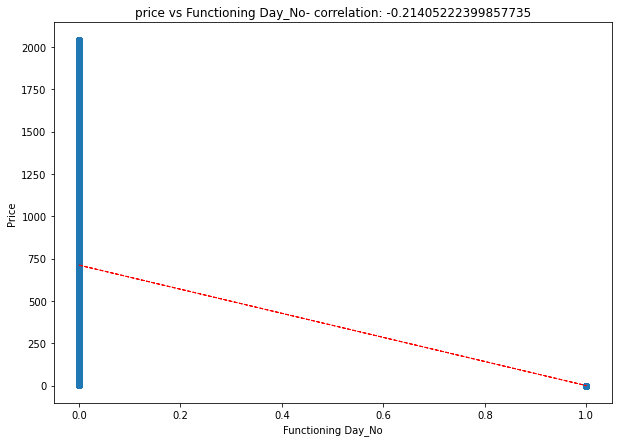

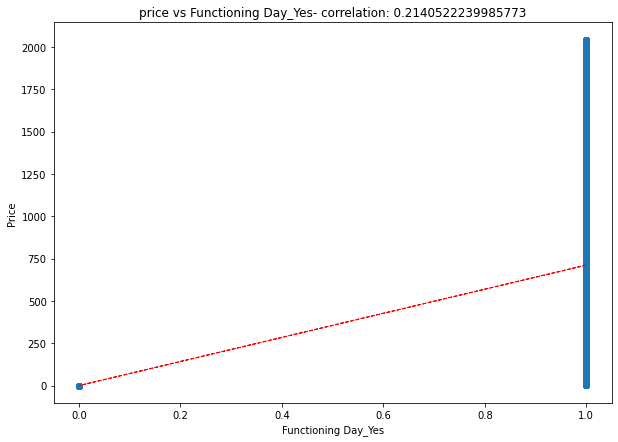

In [ ]:
for col in numeric_features:
  fig=plt.figure(figsize=(10,7))
  ax = fig.gca()
  feature=df[col]
  label=df['Rented Bike Count']
  relation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('price vs ' + col + '- correlation: ' + str(relation))
  z = np.polyfit(feature, label, 1)
  y_hat = np.poly1d(z)(feature)
  plt.plot(feature, y_hat, "r--", lw=1)

plt.show()


# Machine learning

In [ ]:
#defing data for test train
x=df.drop(['Rented Bike Count'],axis=1)
y=df['Rented Bike Count']

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#scaling
scalar=StandardScaler()
scale=scalar.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 2.60569550e+01,  9.77509107e+00, -1.18163314e+01,  1.91455597e+01,
        1.49413730e-02,  1.57971961e+01, -6.11588141e+01,  1.32239829e+00,
       -8.98421710e+01,  1.77106291e+02,  3.31972036e+01,  5.51653918e+00,
       -2.15820034e+02, -6.10355126e+01,  6.10355126e+01, -4.63523727e+02,
        4.63523727e+02])

In [ ]:
model.intercept_

181660.98282367512

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([ 915.05241836, 1156.44578752, 1300.55176125, ...,  894.74653089,
       -163.63424052, 1274.71707039])

In [ ]:
y_test

6056    1728.0
5556     822.0
5990     658.0
7674    2043.0
3319    1083.0
         ...  
8307     122.0
100       42.0
6605     179.0
1783     294.0
6013     673.0
Name: Rented Bike Count, Length: 1752, dtype: float64

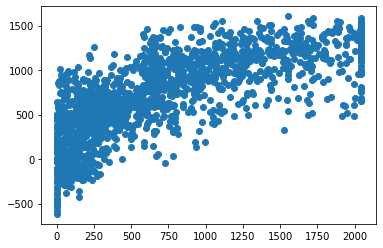

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.5507495679192476

In [ ]:
#function to find adjusted r2
def adj_r2(x,y):
  r2=r2_score(x,y)
  n=x_test.shape[0]
  p=x_test.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [ ]:
adj_r2(y_test,y_pred)

0.5463451519184559

# Hyper parameter tuning and cross validation for linear regression using Lasso and Ridge regularization 

Finding the best parameter alpha from cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV,RidgeCV
#from sklearn.model_selection import Ridge
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lasso=LassoCV(alphas=None,cv=5,max_iter=20000,normalize=True)
lasso.fit(x_train,y_train)

LassoCV(cv=5, max_iter=20000, normalize=True)

In [ ]:
lasso.alpha_

0.003936767963427756

In [ ]:
lasso=Lasso(alpha=0.00413)
lasso.fit(x_train,y_train)

Lasso(alpha=0.00413)

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

0.21016879463208193

In [ ]:
adj_r2(y_test,y_pred)

0.546346207261174

In [ ]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=5,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([7.2432806 , 4.68766619, 6.86588646, 4.01824935, 1.0792283 ,
       3.1727975 , 9.91155633, 1.5812555 , 2.81268168, 7.56640681,
       1.56647942, 8.18003041, 1.72986954, 5.95353292, 4.61302102,
       5.05431079, 9.02844673, 2.77522668, 8.88211324, 4.17568828,
       4.80338734, 6.74119188, 9.49771156, 0.23846992, 3.7346946 ,
       5.57345644, 8.44760891, 4.28347038, 5.86988139, 4.37294569,
       7.59923412, 2.02046028, 1.0699427 , 6.97180385, 8.22041671,
       1.96956137, 7.08320963, 6.2834044 , 4.38667179, 0.03694058,
       3.92805571, 5.30916345, 1.39797122, 3.59860946, 7.04975094,
       5.60391094, 9.18909036, 8.23997678, 6.88107029, 9.76346619]),
        cv=5, normalize=True)

In [ ]:
ridgecv.alpha_

0.03694058262844968

In [ ]:
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=0.03694058262844968)

In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

0.210191010376232

In [ ]:
adj_r2(y_pred,y_test)

0.2024477849877636

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#defining variable for decision tree regressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#predicting values from the x_test from the model
y_pred = regressor.predict(x_test)


In [ ]:
print('Rsquare: ',r2_score(y_pred,y_test))

Rsquare:  0.7281814308069742


In [ ]:
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

adjusted_Rsquare:  0.7255165428737091


In [ ]:
regressor.feature_importances_


array([2.73659372e-01, 3.08080083e-01, 1.12743375e-01, 2.02676815e-02,
       2.12294173e-02, 2.52603624e-02, 8.24385399e-02, 1.49107683e-02,
       3.46632254e-04, 2.96354179e-02, 1.11491791e-02, 1.52450169e-03,
       9.27236003e-06, 2.27519574e-03, 2.00890194e-03, 3.26408140e-02,
       6.18204858e-02])

#  Hyperparameter tuning and cross validation on Decision Tree

In [ ]:
param={'max_depth':[3,5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[5,10,20,50],
       'max_leaf_nodes':[20,40,80,100]
       }

In [ ]:
cv_model=GridSearchCV(regressor,param_grid=param,cv=3,verbose=3)

In [ ]:
cv_model.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.575 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.600 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.575 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.600 tota

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_leaf_nodes': [20, 40, 80, 100],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 20, 40]},
             verbose=3)

In [ ]:
r2_score(y_test, cv_model.best_estimator_.predict(x_test))

0.7856279456464191

In [ ]:
print('R square score=',cv_model.best_score_)

R square score= 0.80295622244999


In [ ]:
print('Best parameters are:',cv_model.best_params_)

Best parameters are: {'max_depth': 11, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
scores=cross_val_score(cv_model,x_train,y_train,cv=5)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.564 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.585 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.578 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.564 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.585 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.578 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.564 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.585 tota

In [ ]:
print('cross validation score=',np.mean(scores))

cross validation score= 0.8136045981645277


# Random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

0.8300895349443292

In [ ]:
adj_r2(y_pred,y_test)

0.8284237460712345

# Hyper parameter tuning and Cross validation on Random forest

In [ ]:
param={'max_depth':[5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[10,20],
       'max_leaf_nodes':[20,40,80],
       'n_estimators':[100,200,300]
         }

In [ ]:
cv_model=GridSearchCV(rf,param_grid=param,cv=3,verbose=3)
cv_model.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.742 total time=   0.9s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.769 total time=   0.9s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.773 total time=   1.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.745 total time=   1.9s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.769 total time=   1.8s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.771 total time=   1.8s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, sc

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_leaf_nodes': [20, 40, 80],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [ ]:
cv_model.best_score_

0.8361786539183785

In [ ]:
cv_model.best_params_

{'max_depth': 11,
 'max_leaf_nodes': 80,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 200}

In [ ]:
scores=cross_val_score(cv_model,x_train,y_train,cv=3)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.788 total time=   0.6s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.765 total time=   0.6s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.768 total time=   0.7s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.789 total time=   1.3s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.768 total time=   1.3s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.766 total time=   1.3s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, sc

In [ ]:
print('cross validation score=',np.mean(scores))

cross validation score= 0.8363404432971265


Support Vector Machines

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm= SVR(kernel='rbf')
svm.fit(x_train,y_train)

SVR()

In [ ]:
y_pred=svm.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

-86.8220583202439

In [ ]:
adj_r2(y_pred,y_test)

-87.68305889201099

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#calling Kneighbors variable and fitting it
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
#predicting values from the train test
y_pred=knn.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)

0.3112441116838839

In [ ]:
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn,param_grid=param_dict)
knn_grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 23, 25]})

In [ ]:
knn_grid.best_score_

0.5507623585896593

In [ ]:
score=cross_val_score(knn_grid,x_train,y_train,cv=3)

In [ ]:
np.mean(score)

0.5303567744191714